In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.tree import *
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

from sklearn import metrics
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_theme(style="whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing Train and Test Dataframes**

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Viewing the info for the data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Viewing null values in the dataset.

### Viewing the null values in the dataset.
* Age can be filled in with the median.
* Embarked can be filled in with the mode. 

In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finding the median age of the passengers on the titanic.

In [6]:
median_age = train_df['Age'].median()
print(f'The average age of the passengers on the titanic in our dataset was {median_age} years old.')

The average age of the passengers on the titanic in our dataset was 28.0 years old.


Filling in the Age column with the median age, which is 28.0.

In [7]:
train_df['Age'] = train_df['Age'].fillna(median_age)

Sanity Check on the null values being filled in.

In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking to make sure that filling in the null values with the median age didn't affect the median age of the set.

In [9]:
median_age = train_df['Age'].median()
print(f'The average age of the passengers on the titanic in our dataset is still {median_age} years old.')

The average age of the passengers on the titanic in our dataset is still 28.0 years old.


Filling in the Embarked column with the most common embarkment point.

In [10]:
embark_most = train_df['Embarked'].mode()
train_df['Embarked'] = train_df['Embarked'].fillna('S')


Sanity checking that the null values are filled in the Embarked column.

In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Plan for the ML model:
*    Change Sex and Embarked with either OHE, Label Encoding, or Ordinal Encoding.
*    Drop Name, PassengerID, Cabin, and Ticket Number**

# EDA/Finding Patterns in the Code

<h3><b>Comparing Survival Rates on the Titanic</b></h3>

Text(0.5, 1.0, 'Survived vs Perished')

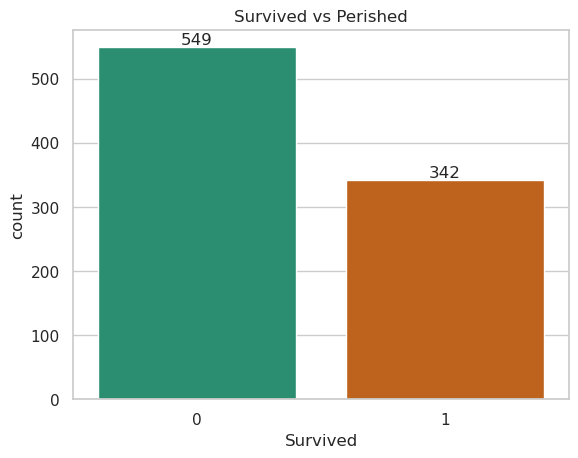

In [12]:
ax = sns.countplot(x='Survived', data=train_df, palette='Dark2')
ax.bar_label(ax.containers[0])
ax.set_title('Survived vs Perished')

<h3><b>Comparing the Survival Rates Between the different genders on the boat</b></h3>

Text(0, 0.5, '# of Passengers')

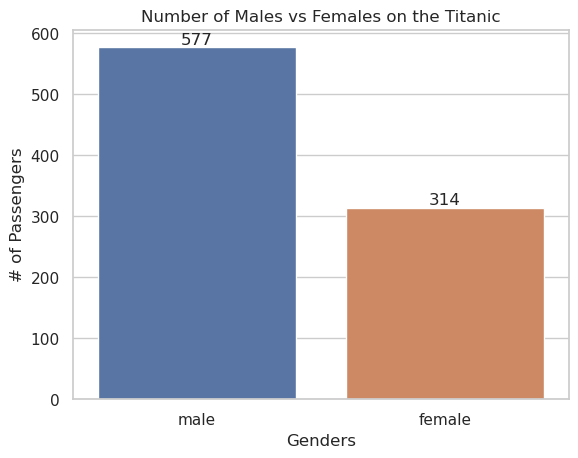

In [13]:
ax = sns.countplot(x=train_df["Sex"])
for label in ax.containers:
    ax.bar_label(label)
ax.set_title('Number of Males vs Females on the Titanic')
ax.set_xlabel('Genders')
ax.set_ylabel('# of Passengers')


In [14]:
females = train_df[train_df['Sex'] == 'female']
female_survival = females.groupby('Survived')['Sex'].count()
female_survival

Survived
0     81
1    233
Name: Sex, dtype: int64

In [15]:
males = train_df[train_df['Sex'] == 'male']
male_survival = females.groupby('Survived')['Sex'].count()
male_survival

Survived
0     81
1    233
Name: Sex, dtype: int64

Plotting the Survival Rates between Males and Females 

Text(0, 0.5, '# of Passengers')

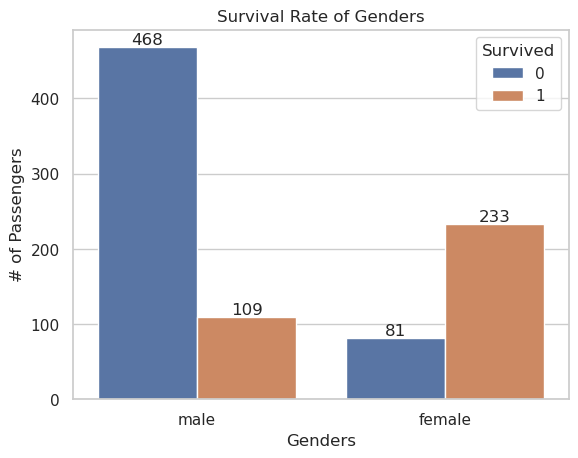

In [16]:
ax = sns.countplot(data=train_df, x="Sex", hue="Survived")
for label in ax.containers:
    ax.bar_label(label)
ax.set_title('Survival Rate of Genders')
ax.set_xlabel('Genders')
ax.set_ylabel('# of Passengers')

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Viewing the descrepency between the ticket cost between the different classes

In [18]:
class_fare = train_df.groupby('Pclass')['Fare'].mean()
class_fare

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Converting Class Fare Series to a Dataframe

In [19]:
class_fare = class_fare.to_frame().reset_index()
class_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  3 non-null      int64  
 1   Fare    3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


Converted mean of class fares to a dataframe

In [20]:
class_fare

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


<h3><b>Comparing the Survival Rates Between the different classes on the boat</b></h3>

We can see a correlation between the survival rate and the class that the passenger was in. If you were in the 1st class, you had around a 63% chance of survival on the titanic. If you were in the 2nd class of passengers then you had about a 50% chance of survival. Whereas, the 3rd class passengers had a 24% chance of survival. 

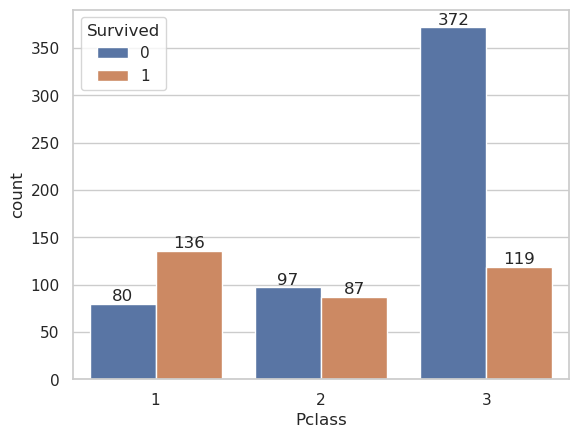

In [21]:
ax = sns.countplot(data=train_df, x="Pclass", hue="Survived")
for label in ax.containers:
    ax.bar_label(label)

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data_encoded = pd.get_dummies(train_df, columns = ['Embarked', 'Sex'])
data_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [24]:
test_df_encoded = pd.get_dummies(test_df, columns = ['Embarked', 'Sex'])
test_df_encoded.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0


Looking at the correlations between the different features

In [25]:
data_encoded.corr()

/tmp/ipykernel_21/4068359255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_encoded.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,-0.081163,0.081163
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333
Embarked_C,-0.001205,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853
Embarked_Q,-0.033606,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115
Embarked_S,0.022204,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224


Created a correlation heatmap of our features in the dataframe. We can see that there is a high correlation between the female category and survival and a high negative correlation between being male and survival. The second highest correlation is between fare and survival. This outcome is logical and agrees with our views on the dataset above. 

/tmp/ipykernel_21/1038233978.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data_encoded.corr(), dtype=np.bool))
/tmp/ipykernel_21/1038233978.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data_encoded.corr(), dtype=np.bool))
/tmp/ipykernel_21/1038233978.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value

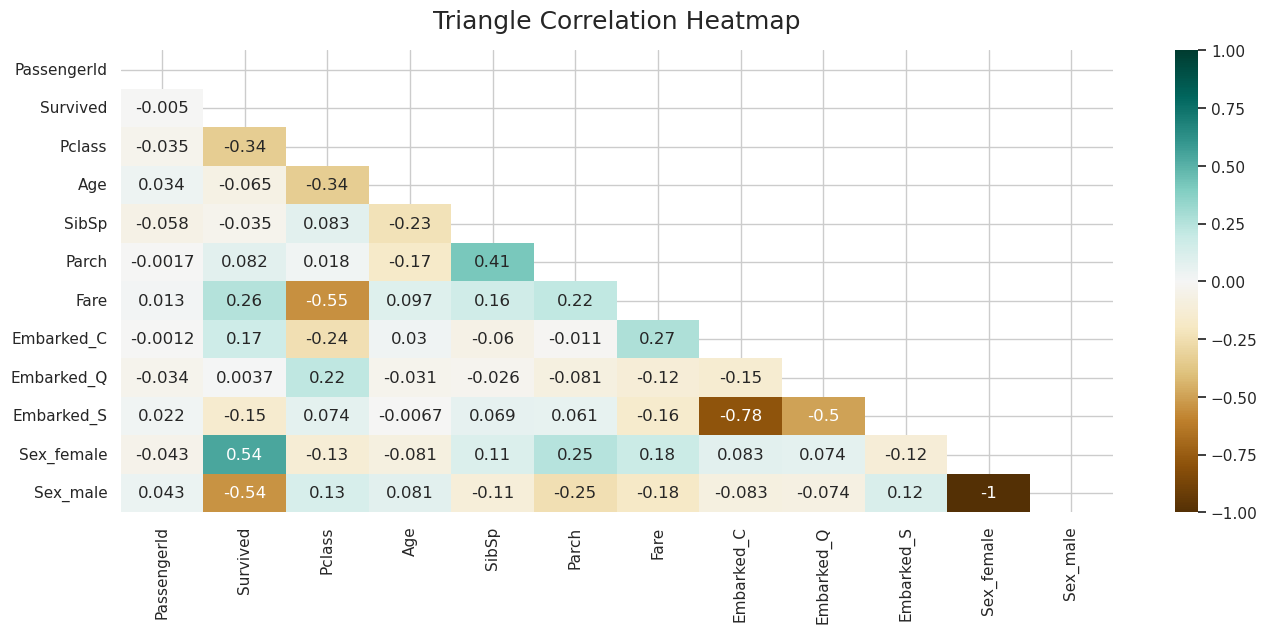

In [26]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_encoded.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_encoded.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Further exploring the correlation between the features of the dataframe and the target of the dataframe. We can see that age, passenger id, sibling status, and embarked had a very low correlation to the survival rate. Whereas, female vs male, and the differences in the fares, and the class that you were in had a more significant correlation to the survival rate.

/tmp/ipykernel_21/1260003490.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  saleprice_corr = data_encoded.corr()[['Survived']].sort_values(by='Survived', ascending=False)


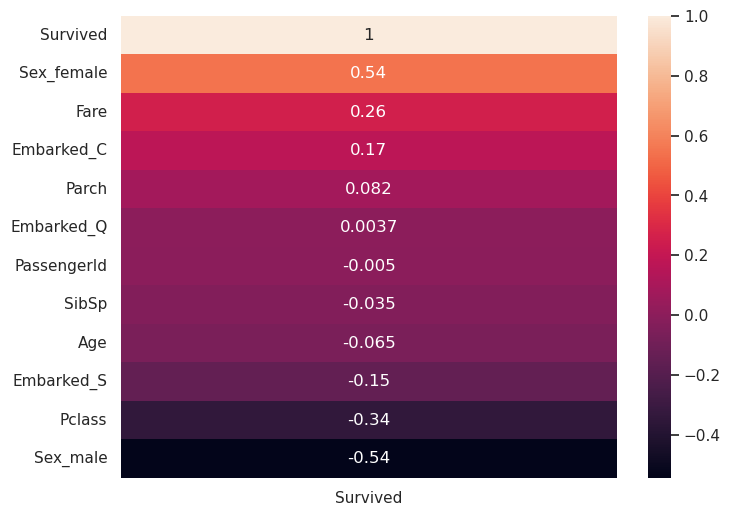

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
saleprice_corr = data_encoded.corr()[['Survived']].sort_values(by='Survived', ascending=False)
sns.heatmap(saleprice_corr, annot=True, ax=ax)
plt.show()

# Machine Learning Predictions

Creating Final Dataframe for ML Predictions

In [28]:
final_df = data_encoded[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                         'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female','Sex_male']]

Viewing Dataframe

In [29]:
test_df_encoded['Age'] = test_df_encoded['Age'].fillna(median_age)
test_df_encoded['Fare'] = test_df_encoded['Fare'].fillna(26)
test_df_encoded.isna().sum()

PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

Features and Target Dataframes

In [30]:
y = final_df["Survived"]

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                         'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female','Sex_male']
X = final_df[features]
X_test = test_df_encoded[features]


print(X.shape, y.shape, X_test.shape)

(891, 10) (891,) (418, 10)


In [31]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfc_model.fit(X, y)
predictions = rfc_model.predict(X_test)

rfc_score = round(rfc_model.score(X, y) * 100, 2)
print(rfc_score)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

84.29
Your submission was successfully saved!


In [32]:
dummy_model = DummyClassifier()
dummy_model.fit(X, y)

# Predict the target variable on the test set
y_pred = dummy_model.predict(X_test)

dummy_score = round(dummy_model.score(X, y) * 100, 2)
print(dummy_score)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

61.62
Your submission was successfully saved!


In [33]:
lr_model = LogisticRegression(random_state=12345)
lr_model.fit(X, y)
y_pred = lr_model.predict(X_test)

lr_score = round(lr_model.score(X, y) * 100, 2)
print(lr_score)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

80.25
Your submission was successfully saved!


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
xgb_model = XGBClassifier(n_estimators=40, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X, y)
xgb_class_pred = xgb_model.predict(X_test)

xgb_score = round(xgb_model.score(X, y) * 100, 2)
print(xgb_score)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

90.68
Your submission was successfully saved!


In [35]:
xgb_withparams_model = XGBClassifier(n_estimators=100, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_withparams_model.fit(X, y)
xgb_pred = xgb_withparams_model.predict(X_test)
xgb_withparams_score = round(xgb_withparams_model.score(X, y) * 100, 2)
print(xgb_withparams_score)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': xgb_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

94.28
Your submission was successfully saved!


In [36]:
models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'DummyClassifier', 'Logistic Regression', 
              'XGBClassifier', 'XGBClassifier100estimators'],
    'Score': [rfc_score, dummy_score, lr_score, 
              xgb_score, xgb_withparams_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBClassifier100estimators,94.28
3,XGBClassifier,90.68
0,RandomForestClassifier,84.29
2,Logistic Regression,80.25
1,DummyClassifier,61.62


In [37]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": xgb_class_pred
    })
